## Importing necessary libraries

In [2]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

Using TensorFlow backend.


In [3]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras import backend as k
from keras.layers import AveragePooling2D

## Importing dataset and pre-processing

In [4]:
(X_train , Y_train) , (X_test , Y_test) = mnist.load_data()

In [5]:
#adding number of channels
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
Y_train = keras.utils.to_categorical(Y_train,10)
Y_test = keras.utils.to_categorical(Y_test,10)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#normalization
X_train /= 255
X_test /= 255

In [6]:
from tensorflow.python.framework import ops
ops.reset_default_graph()

## Model

In [42]:
batch_size = 32
epochs = 10
model = keras.Sequential()
model.add(layers.Conv2D(40,kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
model.add(layers.AveragePooling2D(pool_size=(2,2) , strides=1))
model.add(layers.Conv2D(50,kernel_size=(5,5), activation='relu'))
model.add(layers.AveragePooling2D(pool_size=(2,2) , strides=1))
model.add(layers.Flatten())
model.add(layers.Dense(120,activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [43]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=["accuracy"])

## Training model

In [44]:
hist = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test,Y_test))
print("The model is successfully trained!")

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 244us/sample - loss: 1.8927 - accuracy: 0.5689 - val_loss: 1.1798 - val_accuracy: 0.7837
Epoch 2/10
60000/60000 [==============================] - 15s 255us/sample - loss: 0.7877 - accuracy: 0.8214 - val_loss: 0.5505 - val_accuracy: 0.8665
Epoch 3/10
60000/60000 [==============================] - 15s 258us/sample - loss: 0.5042 - accuracy: 0.8650 - val_loss: 0.4299 - val_accuracy: 0.8861
Epoch 4/10
60000/60000 [==============================] - 15s 255us/sample - loss: 0.4269 - accuracy: 0.8810 - val_loss: 0.3824 - val_accuracy: 0.8961
Epoch 5/10
60000/60000 [==============================] - 15s 257us/sample - loss: 0.3887 - accuracy: 0.8904 - val_loss: 0.3550 - val_accuracy: 0.9015
Epoch 6/10
60000/60000 [==============================] - 15s 255us/sample - loss: 0.3640 - accuracy: 0.8957 - val_loss: 0.3348 - val_accuracy: 0.9052
Epoch 7/10
60000/60000 [====================

## Testing model

In [45]:
ans = model.predict(X_test)

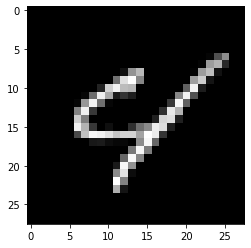

In [46]:
plt.imshow(X_test[420][:,:,0], cmap=plt.get_cmap('gray'))

In [47]:
ans[420].argmax()

4